In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import re

In [2]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [7]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                      des  zone  ...  \
0       Matt Olson pops out to shortstop Francisco Lin...  12.0  ...   
1       Francisco Lindor homers (33) on a fly ball to ...   8.0  ...   
2                     Marcell Ozuna strikes out swinging.   6.0  ...   
3                     Marcell Ozuna strikes out swinging.  14.0  ...   
4                     Marcell Ozuna strikes out swinging.   5.0  ...   
...                                                   ...   ...  ...   
196956  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196957  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196958  Bryan Reynolds lines out to right fielder Lane...   5.0  ...   
196959                   Oneil Cruz strikes out swinging.  13.0  ...   
196960                   Oneil Cruz strikes out swinging.  13.0  ...   

       estimated_woba_using_speedangle woba_value arm_angle bat_speed  \
0                                0.039        0.0      17.8      77.4   
1                                1.621        2.0      39.4      80.2   
2                                0.000        0.0      25.3      78.4   
3                                  NaN        NaN      22.1      79.5   
4                                  NaN        NaN      18.4      77.4   
...                                ...        ...       ...       ...   
196956                           0.003        0.0      31.7      64.2   
196957                             NaN        NaN      31.5      66.8   
196958                           0.439        0.0      15.5      70.9   
196959                           0.000        0.0      14.8      82.1   
196960                             NaN        NaN      15.8      81.3   

        swing_length  bat_speed_pred  swing_length_pred  bat_speed_residual  \
0                7.0       72.630213           6.851235            4.769787   
1                8.1       73.566324           7.948831            6.633676   
2                8.1       74.373570           7.287232            4.026430   
3                8.5       69.598224           8.102444            9.901776   
4                8.0       73.445847           6.833112            3.954153   
...              ...             ...                ...                 ...   
196956           6.2       67.746497           6.518272           -3.546497   
196957           6.0       69.811933           6.778951           -3.011933   
196958           7.2       71.598932           6.546403           -0.698932   
196959           8.5 

In [4]:
from baseball_utilities.display import *
set_pandas_display_all()

In [3]:
from baseball_utilities.data import *
pbp_2024 = get_table("statcast_2024")

In [17]:
fangraphs_batting_min_400_2024 = get_table("fangraphs_batting_min_400_2024")

In [70]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [71]:
def remove_accents(name):
    if isinstance(name, str):
        return unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode("utf-8")
    return name
def normalize_name(name):
    if isinstance(name, str):
        return re.sub(r"\s+", " ", name.replace(".", "")).strip().lower()
    return name

In [74]:
swings_2024 = swings_2024.merge(
    pbp_2024[['batter', 'batter_name']].drop_duplicates(),
    on='batter',
    how='left'
)

In [75]:
swings_2024["batter_name"] = swings_2024["batter_name"].apply(remove_accents)
swings_2024["batter_name"] = swings_2024["batter_name"].apply(normalize_name)
fangraphs_batting_min_400_2024["Name"] = fangraphs_batting_min_400_2024["Name"].apply(normalize_name)
fangraphs_batting_min_400_2024["Name"] = fangraphs_batting_min_400_2024["Name"].apply(remove_accents)

In [76]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                                                       des  \
0                                       Matt Olson pops out to shortstop Francisco Lindor.   
1       Francisco Lindor homers (33) on a fly ball to center field. Starling Marte scores.   
2                                                      Marcell Ozuna strikes out swinging.   
3                                                      Marcell Ozuna strikes out swinging.   
4                                                      Marcell Ozuna strikes out swinging.   
...                                                                                    ...   
196956               CJ Abrams pops out to third baseman Ke'Bryan Hayes in foul territory.   
196957               CJ Abrams pops out to third baseman Ke'Bryan Hayes in foul territory.   
196958                              Bryan Reynolds lines out to right fielder Lane Thomas.   
196959                                                    Oneil Cruz strikes out swinging.   
196960                                                    Oneil Cruz strikes out swinging.   

        zone game_type stand p_throws     bb_type  balls  strikes  game_year  \
0       12.0         R     L        R       popup      0        0       2024   
1        8.0         R     L        R    fly_ball      0        0       2024   
2        6.0         R     R        R         NaN      3        2       2024   
3       14.0         R     R        R         NaN      2        1       2024   
4        5.0         R     R        R         NaN      1        0       2024   
...      ...       ...   ...      ...         ...    ...      ...        ...   
196956   2.0         R     L        R       popup      3        1       2024   
196957   2.0         R     L        R         NaN      1        0       2024   
196958   5.0         R     L        R  line_drive      1        1       2024   
196959  13.0         R     L        R         NaN      2        2       2024   
196960  13.0         R     L        R         NaN      2        1       2024   

        plate_x  plate_z  launch_speed  launch_angle  effective_speed  \
0          0.84     2.93          76.1          58.0             96.5   
1          0.15     1.72         107.2          35.0             86.2   
2          0.55     2.52           NaN           NaN             92.1   
3          0.94     1.28           NaN           NaN             91.7   
4         -0.18     2.89           NaN          86.0             99.3   
...         ...      ... 

In [92]:
batter_outlier_avg = (
    swings_2024
    .groupby(["batter", "batter_name"])
    .agg(
        total_outlier_prob=("outlier_prob", "sum"),
        num_swings=("batter", "size")
    )
    .assign(avg_outlier_prob=lambda df: df["total_outlier_prob"] / df["num_swings"])
    .sort_values("avg_outlier_prob", ascending=False)
)
batter_outlier_avg = batter_outlier_avg.reset_index()

In [93]:
batter_outlier_avg.head(25)

batter        batter_name  total_outlier_prob  num_swings  \
0   670032        nicky lopez             167.117         711   
1   650490         yandy diaz             229.845         992   
2   660821      jesus sanchez             209.770         982   
3   680977    brendan donovan             189.005         999   
4   681351      logan o'hoppe             175.684         949   
5   657077       alex verdugo             171.614         933   
6   657041        lane thomas             155.470         858   
7   665926     andres gimenez             214.277        1219   
8   670623      isaac paredes             198.118        1187   
9   606115      orlando arcia             172.929        1039   
10  676609     jose caballero             137.187         832   
11  600869  jeimer candelario             134.546         834   
12  680777       ryan jeffers             133.962         833   
13  664983      jake mccarthy             125.709         800   
14  663616     trevor larnach             105.203         674   
15  457705   andrew mccutchen             128.591         849   
16  641933      tyler o'neill             118.667         809   
17  571448      nolan arenado             151.908        1091   
18  671732    lawrence butler             110.528         798   
19  665750      leody taveras             122.784         899   
20  641487       j p crawford              97.712         718   
21  668227    randy arozarena             143.779        1069   
22  664056     harrison bader              94.471         713   
23  683737      michael busch             133.787        1010   
24  595777   jurickson profar             139.079        1078   

    avg_outlier_prob  
0           0.235045  
1           0.231699  
2           0.213615  
3           0.189194  
4           0.185125  
5           0.183938  
6           0.181200  
7           0.175781  
8           0.166906  
9           0.166438  
10          0.164888  
11          0.161326  
12          0.160819  
13          0.157136  
14          0.156088  
15          0.151462  
16          0.146684  
17          0.139237  
18          0.138506  
19          0.136578  
20          0.136089  
21          0.134499  
22          0.132498  
23          0.132462  
24          0.129016

In [79]:
batter_outlier_avg.tail(25)

total_outlier_prob  num_swings  avg_outlier_prob
batter batter_name                                                        
650402 gleyber torres              63.667075        1194          0.053323
660688 keibert ruiz                43.181414         811          0.053245
665489 vladimir guerrero           60.677314        1150          0.052763
593428 xander bogaerts             37.010625         713          0.051908
519317 giancarlo stanton           40.159604         783          0.051289
669016 brandon marsh               38.362105         775          0.049499
592450 aaron judge                 53.957620        1107          0.048742
573262 mike yastrzemski            40.453326         835          0.048447
642715 willy adames                62.811579        1307          0.048058
645277 ozzie albies                39.550892         838          0.047197
668715 spencer steer               51.683279        1100          0.046985
608324 alex bregman                46.434840        1000          0.046435
521692 salvador perez              58.575221        1262          0.046415
656775 cedric mullins              41.569059         905          0.045933
669707 jared triolo                35.257682         769          0.045849
647304 josh naylor                 49.486528        1090          0.045400
592206 nick castellanos            57.258685        1262          0.045371
608369 corey seager                40.508060         904          0.044810
657557 paul dejong                 44.349789        1030          0.043058
670541 yordan alvarez              41.091614        1000          0.041092
656811 ryan o'hearn                34.423525         859          0.040074
682985 riley greene                38.515772         981          0.039262
682998 corbin carroll              38.030977         998          0.038107
664728 kyle isbel                  22.632558         670          0.033780
668939 adley rutschman             26.689754        1090          0.024486

In [80]:
swings_2024["outlier_prob"] = swings_2024["outlier_prob"].round(3)

## Stat Correlations

In [19]:
fangraphs_batting_min_400_2024

IDfg  Season                   Name   Team  Age    G   AB   PA    H  \
0    24816    2024             Andy Pages    LAD   23  116  403  443  100   
1    24488    2024          Max Schuemann    OAK   27  133  396  459   87   
2    22857    2024          Wenceel Perez    DET   24  112  389  425   94   
3    23565    2024        Davis Schneider    TOR   25  135  397  454   76   
4    19339    2024            Nicky Lopez    CHW   29  124  398  445   96   
5    18882    2024           Brandon Lowe    TBR   29  107  385  425   94   
6    28806    2024        Jackson Chourio    MIL   20  148  528  573  145   
7    25764    2024         Bobby Witt Jr.    KCR   24  161  636  709  211   
8    13590    2024           Jesse Winker  - - -   30  145  430  508  109   
9    26288    2024        Adley Rutschman    BAL   26  148  571  638  143   
10   15640    2024            Aaron Judge    NYY   32  158  559  704  180   
11   21454    2024          Lars Nootbaar    STL   26  109  348  405   85   
12   33333    2024         Wyatt Langford    TEX   22  134  499  557  126   
13   13152    2024          Jorge Polanco    SEA   30  118  417  469   89   
14   27815    2024        Jordan Westburg    BAL   25  107  416  447  110   
15   26323    2024          Spencer Steer    CIN   26  158  574  656  129   
16    7859    2024       Charlie Blackmon    COL   37  124  449  499  115   
17   14274    2024          Mitch Haniger    SEA   33  121  380  423   79   
18   19287    2024          Adolis Garcia    TEX   31  154  580  637  130   
19   21711    2024             Oneil Cruz    PIT   25  146  541  599  140   
20   18568    2024            Luis Arraez  - - -   27  150  637  672  200   
21   21479    2024           Nico Hoerner    CHC   27  151  582  641  159   
22   19566    2024         Nathaniel Lowe    TEX   28  140  486  565  129   
23   14221    2024            Jorge Soler  - - -   32  142  493  574  119   
24   25493    2024             Joey Ortiz    MIL   25  142  440  511  105   
25   10324    2024          Marcell Ozuna    ATL   33  162  606  688  183   
26   22184    2024           Mark Vientos    NYM   24  111  413  454  110   
27   29622    2024            Sal Frelick    MIL   24  145  475  524  123   
28   19956    2024          Mickey Moniak    LAA   26  124  392  418   86   
29   16556    2024           Ozzie Albies    ATL   27   99  399  435  100   
30   18036    2024       Jake Cronenworth    SDP   30  155  577  656  139   
31   14551    2024      Anthony Santander    BAL   29  155  595  665  140   
32   17452    2024              Jose Siri    TBR   28  130  402  448   75   
33   17929    2024         Cedric Mullins    BAL   29  147  444  499  104   
34   27899    2024             Colt Keith    DET   22  148  516  556  134   
35   19755    2024          Shohei Ohtani    LAD   29  159  636  731  197   
36   25816    2024        Shea Langeliers    OAK   26  137  482  534  108   
37   13185    2024          Orlando Arcia    ATL   29  157  551  602  120   
38   26289    2024       Gunnar Henderson    BAL   23  159  630  719  177   
39   19901    2024           Gavin Sheets    CHW   28  139  451  501  105   
40   16478    2024         Kyle Schwarber    PHI   31  150  573  692  142   
41    5361    2024        Freddie Freeman    LAD   34  147  542  638  153   
42   27479    2024             Masyn Winn    STL   22  150  587  637  157   
43   17901    2024      Andrew Benintendi    CHW   29  135  477  522  109   
44   27647    2024          Anthony Volpe    NYY   23  160  637  689  155   
45   15998    2024         Cody Bellinger    CHC   28  130  516  569  137   
46   29490    2024        Jackson Merrill    SDP   21  156  554  593  162   
47   22197    2024            MJ Melendez    KCR   25  135  412  451   85   
48   19709    2024     Fernando Tatis Jr.    SDP   25  102  398  438  110   
49   18373    2024       Ryan Mountcastle    BAL   27  124  473  507  128   
50   20503    2024      William Contreras    MIL   26  155  595  679  167   
51

In [95]:
columns_to_merge = ["mlbam_id" , "BB%", "K%", "BB/K", "OBP", "GB/FB", "LD%", "GB%", "FB%", "HR/FB", "wOBA", "wRC+", 
                    "O-Swing%", "Z-Swing%", "Swing%", "O-Contact%", "Z-Contact%", "Contact%", "Zone%", "SwStr%", 
                    "HardHit%", "maxEV", "CStr%", "CSW%", "Barrel%"]

In [96]:
batter_outlier_avg_fg_stats = (
    batter_outlier_avg.merge(
        fangraphs_batting_min_400_2024[columns_to_merge],
        how = "left",
        left_on = "batter",
        right_on = "mlbam_id"
    )
)

In [86]:
batter_outlier_avg

total_outlier_prob  num_swings  avg_outlier_prob
batter batter_name                                                          
670032 nicky lopez                  167.119570         711          0.235049
650490 yandy diaz                   229.851361         992          0.231705
660821 jesus sanchez                209.794013         982          0.213640
680977 brendan donovan              189.013563         999          0.189203
681351 logan o'hoppe                175.710233         949          0.185153
657077 alex verdugo                 171.624586         933          0.183949
657041 lane thomas                  155.470442         858          0.181201
665926 andres gimenez               214.279063        1219          0.175783
670623 isaac paredes                198.117574        1187          0.166906
606115 orlando arcia                172.931273        1039          0.166440
676609 jose caballero               137.213956         832          0.164921
600869 jeimer candelario            134.548284         834          0.161329
680777 ryan jeffers                 133.970377         833          0.160829
664983 jake mccarthy                125.720374         800          0.157150
663616 trevor larnach               105.208466         674          0.156096
457705 andrew mccutchen             128.585329         849          0.151455
641933 tyler o'neill                118.664639         809          0.146681
571448 nolan arenado                151.901479        1091          0.139231
671732 lawrence butler              110.555089         798          0.138540
665750 leody taveras                122.780100         899          0.136574
641487 j p crawford                  97.702895         718          0.136076
668227 randy arozarena              143.804312        1069          0.134522
664056 harrison bader                94.461097         713          0.132484
683737 michael busch                133.807185        1010          0.132482
595777 jurickson profar             139.095190        1078          0.129031
687401 joey ortiz                   102.222193         796          0.128420
641355 cody bellinger               126.920530         989          0.128332
665833 oneil cruz                   122.805396         961          0.127789
656941 kyle schwarber               134.374825        1060          0.126769
643446 jeff mcneil                  111.816031         886          0.126203
643217 andrew benintendi            111.516551         898          0.124183
542303 marcell ozuna                153.604323        1240          0.123874
670042 luke raley                   101.568217         834          0.121784
457759 justin turner                115.952966         956          0.121290
664040 brandon lowe                 101.294909         851          0.119030
650333 luis arraez                  126.164087        1061          0.118911
657136 connor wong                  108.189795         910          0.118890
502671 paul goldschmidt             144.502451        1224          0.118058
665862 jazz chisholm                118.987149        1016          0.117113
672640 otto lopez                    87.691000         761          0.115231
666624 christopher morel            121.409074        1056          0.114971
641680 jonah heim                   101.894873         889          0.114617
664238 dylan moore                   82.958275         729          0.113797
682928 cj abrams                    128.046972        1134          0.112916
621493 taylor ward                  115.947574        1039          0.111595
593871 jorge polanco                 89.130485         801          0.111274
672284 jarred kelenic                89.781653         807          0.111254
661388 william contreras            132.908402        1202          0.110573
453568 charlie blackmon              92.713073         844          0.109850
673548 seiya suzuki                 103.486769         945          0.109510
656582 connor joe       

In [97]:
batter_outlier_avg_fg_stats

batter          batter_name  total_outlier_prob  num_swings  \
0    670032          nicky lopez             167.117         711   
1    650490           yandy diaz             229.845         992   
2    660821        jesus sanchez             209.770         982   
3    680977      brendan donovan             189.005         999   
4    681351        logan o'hoppe             175.684         949   
5    657077         alex verdugo             171.614         933   
6    657041          lane thomas             155.470         858   
7    665926       andres gimenez             214.277        1219   
8    670623        isaac paredes             198.118        1187   
9    606115        orlando arcia             172.929        1039   
10   676609       jose caballero             137.187         832   
11   600869    jeimer candelario             134.546         834   
12   680777         ryan jeffers             133.962         833   
13   664983        jake mccarthy             125.709         800   
14   663616       trevor larnach             105.203         674   
15   457705     andrew mccutchen             128.591         849   
16   641933        tyler o'neill             118.667         809   
17   571448        nolan arenado             151.908        1091   
18   671732      lawrence butler             110.528         798   
19   665750        leody taveras             122.784         899   
20   641487         j p crawford              97.712         718   
21   668227      randy arozarena             143.779        1069   
22   664056       harrison bader              94.471         713   
23   683737        michael busch             133.787        1010   
24   595777     jurickson profar             139.079        1078   
25   687401           joey ortiz             102.225         796   
26   641355       cody bellinger             126.919         989   
27   665833           oneil cruz             122.810         961   
28   656941       kyle schwarber             134.387        1060   
29   643446          jeff mcneil             111.789         886   
30   643217    andrew benintendi             111.513         898   
31   542303        marcell ozuna             153.600        1240   
32   670042           luke raley             101.565         834   
33   457759        justin turner             115.933         956   
34   664040         brandon lowe             101.285         851   
35   650333          luis arraez             126.151        1061   
36   657136          connor wong             108.189         910   
37   502671     paul goldschmidt             144.488        1224   
38   665862        jazz chisholm             118.983        1016   
39   672640           otto lopez              87.672         761   
40   666624    christopher morel             121.380        1056   
41   641680           jonah heim             101.889         889   
42   664238          dylan moore              82.933         729   
43   682928            cj abrams             128.005        1134   
44   621493          taylor ward             115.930        1039   
45   593871        jorge polanco              89.133         801   
46   672284       jarred kelenic              89.782         807   
47   661388    william contreras             132.882        1202   
48   453568     charlie blackmon              92.706         844   
49   673548         seiya suzuki             103.469         945   
50   656582           connor joe              70.503         647   
51   543807      george springer             114.654        1053   
52   669701           josh smith             113.613        1048   
53   678662       ezequiel tovar             152.610        1420   
54   696285          jacob young              84.273         786   
55   641857         ryan mcmahon             126.366        1182   
56   547180         bryce harper             128.628        1208   
57   663624     ryan mountcastle             104.481         

In [100]:
print(X.isna().sum(), y.isna().sum())

0 0


In [91]:
batter_outlier_avg_fg_stats[batter_outlier_avg_fg_stats["BB%"].isna()]

total_outlier_prob  num_swings  avg_outlier_prob Name  BB%  K%  BB/K  \
20            97.702895         718          0.136076  NaN  NaN NaN   NaN   
38           118.987149        1016          0.117113  NaN  NaN NaN   NaN   
80            94.498746         983          0.096133  NaN  NaN NaN   NaN   
108          101.514105        1219          0.083277  NaN  NaN NaN   NaN   
129           53.747399         702          0.076563  NaN  NaN NaN   NaN   
130           54.537405         714          0.076383  NaN  NaN NaN   NaN   
141           65.508462         898          0.072949  NaN  NaN NaN   NaN   
146           66.412477         935          0.071029  NaN  NaN NaN   NaN   
148           43.497180         626          0.069484  NaN  NaN NaN   NaN   
152           53.033547         792          0.066962  NaN  NaN NaN   NaN   
165           53.296023         840          0.063448  NaN  NaN NaN   NaN   
184           60.677314        1150          0.052763  NaN  NaN NaN   NaN   

     OBP  GB/FB  LD%  GB%  FB%  HR/FB  wOBA  wRC+  O-Swing%  Z-Swing%  Swing%  \
20   NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
38   NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
80   NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
108  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
129  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
130  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
141  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
146  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
148  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
152  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
165  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   
184  NaN    NaN  NaN  NaN  NaN    NaN   NaN   NaN       NaN       NaN     NaN   

     O-Contact%  Z-Contact%  Contact%  Zone%  SwStr%  HardHit%  maxEV  CStr%  \
20          NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
38          NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
80          NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
108         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
129         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
130         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
141         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
146         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
148         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
152         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
165         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   
184         NaN         NaN       NaN    NaN     NaN       NaN    NaN    NaN   

     CSW%  Barrel%  
20    NaN      NaN  
38    NaN      NaN  
80    NaN      NaN  
108   NaN      NaN  
129   NaN      NaN  
130   NaN      NaN  
141   NaN      NaN  
146   NaN      NaN  
148   NaN      NaN  
152   NaN      NaN  
165   NaN      NaN  
184   NaN      NaN

Text(0.05, 0.95, 'Pearson coefficient $(\\rho_{X,Y})$ = 0.002')

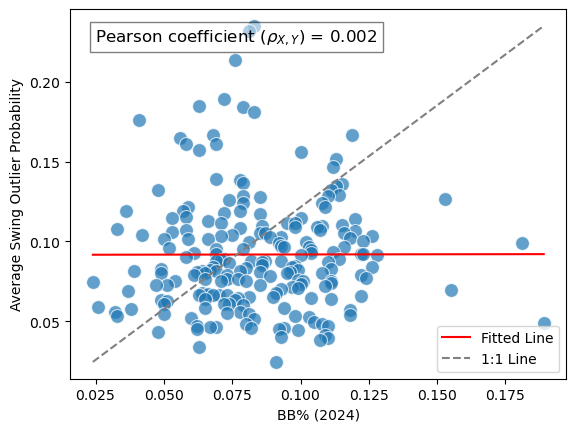

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

X = batter_outlier_avg_fg_stats["BB%"]
y = batter_outlier_avg_fg_stats["avg_outlier_prob"]

slope, intercept, r_value, p_value, std_error = linregress(X,y)
r, pval = pearsonr(X,y)

X_val = np.linspace(X.min(), X.max(), 100)
y_val = intercept + slope * X_val

sns.scatterplot(x = X, y = y, s = 100, alpha = 0.7)
plt.plot(X_val, y_val, color='red', label = 'Fitted Line')
plt.plot([X.min(), X.max()], [y.min(), y.max()], linestyle = '--', color = 'gray', label = '1:1 Line')

plt.xlabel("BB% (2024)")
plt.ylabel("Average Swing Outlier Probability")
plt.legend()

plt.gca().text(
    0.05, 0.95, 
    f'Pearson coefficient $(\\rho_{{X,Y}})$ = {r:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.5)
)



Text(0.05, 0.95, 'Pearson coefficient $(\\rho_{X,Y})$ = -0.111')

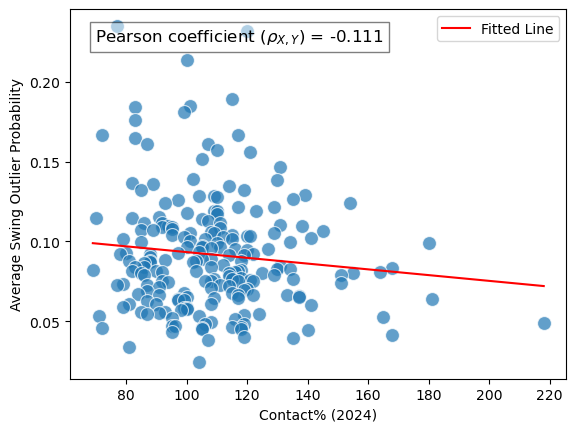

In [110]:
X = batter_outlier_avg_fg_stats["wRC+"]
y = batter_outlier_avg_fg_stats["avg_outlier_prob"]

slope, intercept, r_value, p_value, std_error = linregress(X,y)
r, pval = pearsonr(X,y)
r

X_val = np.linspace(X.min(), X.max(), 100)
y_val = intercept + slope * X_val

sns.scatterplot(x = X, y = y, s = 100, alpha = 0.7)
plt.plot(X_val, y_val, color='red', label = 'Fitted Line')

plt.xlabel("Contact% (2024)")
plt.ylabel("Average Swing Outlier Probability")
plt.legend()

plt.gca().text(
    0.05, 0.95, 
    f'Pearson coefficient $(\\rho_{{X,Y}})$ = {r:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.5)
)

<Axes: xlabel='wRC+', ylabel='avg_outlier_prob'>

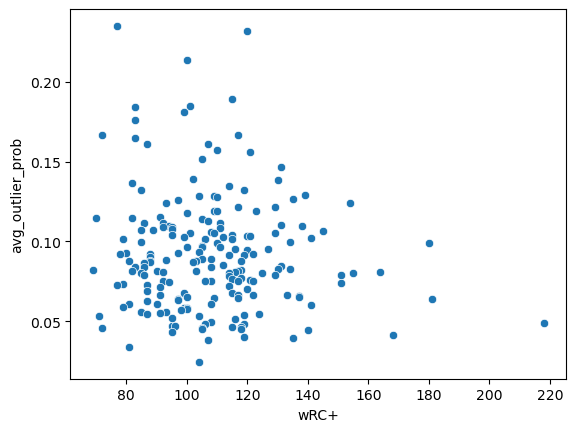

## Player Analysis

In [14]:
jake_mccarthy = swings_2024[swings_2024["batter"] == 670032]

In [63]:
from baseball_utilities.display import *
set_pandas_display_all()
pd.set_option('display.max_rows', None)

In [15]:
jake_mccarthy

pitch_type   game_date  release_speed               player_name  \
2719           ST  2024-09-27           81.4             Hurter, Brant   
2720           ST  2024-09-27           81.6             Hurter, Brant   
2734           ST  2024-09-27           83.0             Hurter, Brant   
2748           SI  2024-09-27           93.3           Hanifee, Brenan   
5363           FF  2024-09-24           95.2              Burke, Brock   
5420           SI  2024-09-24           96.6         Kochanowicz, Jack   
5421           SI  2024-09-24           96.9         Kochanowicz, Jack   
5422           SI  2024-09-24           95.7         Kochanowicz, Jack   
10159          SL  2024-09-20           88.0           Morejon, Adrian   
10160          SI  2024-09-20           96.4           Morejon, Adrian   
10180          SL  2024-09-20           89.7             Scott, Tanner   
10214          ST  2024-09-20           81.0             Musgrove, Joe   
10215          FF  2024-09-20           92.4             Musgrove, Joe   
10244          FC  2024-09-20           89.1             Musgrove, Joe   
10245          ST  2024-09-20           83.3             Musgrove, Joe   
10266          CH  2024-09-20           89.1             Musgrove, Joe   
10267          ST  2024-09-20           83.1             Musgrove, Joe   
11965          FF  2024-09-18           91.2             Quijada, José   
11975          CH  2024-09-18           87.4            Fulmer, Carson   
11976          CH  2024-09-18           88.7            Fulmer, Carson   
11991          FF  2024-09-18           96.7         Kochanowicz, Jack   
11992          SI  2024-09-18           96.0         Kochanowicz, Jack   
12003          SI  2024-09-18           95.1         Kochanowicz, Jack   
12014          SI  2024-09-18           96.7         Kochanowicz, Jack   
12015          SI  2024-09-18           95.8         Kochanowicz, Jack   
13237          FF  2024-09-17           93.3        Strickland, Hunter   
13238          FF  2024-09-17           94.1        Strickland, Hunter   
13286          FF  2024-09-17           92.7          Canning, Griffin   
13304          CH  2024-09-17           87.6          Canning, Griffin   
13305          FF  2024-09-17           93.9          Canning, Griffin   
16310          FF  2024-09-14           94.3             Holman, Grant   
16322          FF  2024-09-14           92.7              Muller, Kyle   
16323          FF  2024-09-14           91.9              Muller, Kyle   
16355          SL  2024-09-14           84.8                Ginn, J.T.   
16356          SL  2024-09-14           85.0                Ginn, J.T.   
16357          CH  2024-09-14           87.1                Ginn, J.T.   
16383          SI  2024-09-14           94.1                Ginn, J.T.   
16393          SI  2024-09-14           93.3                Ginn, J.T.   
16394          SI  2024-09-14           93.4                Ginn, J.T.   
16395          SI  2024-09-14           93.5                Ginn, J.T.   
16396          SI  2024-09-14           92.8                Ginn, J.T.   
20736          SL  2024-09-10           86.9               Herrin, Tim   
20737          SI  2024-09-10           92.4               Herrin, Tim   
20758          SL  2024-09-10           86.6               Morgan, Eli   
20759          FF  2024-09-10           91.1               Morgan, Eli   
20776          CH  2024-09-10           82.2              Avila, Pedro   
20796          CU  2024-09-10           77.4               Lively, Ben   
20797          CH  2024-09-10           84.6               Lively, Ben   
23793          FC  2024-09-07           90.8            Jansen, Kenley   
23815          FF  2024-09-07           96.6            Shugart, Chase   
23816          ST  2024-09-07           80.0            Shugart, Chase   
23842          CH  2024-09-07           84.3          Criswell, Cooper   
23843          FC  2024-09-07           86.2          Criswell, Cooper   
23853      

In [16]:
jake_mccarthy.sort_values(by="outlier_prob", ascending=False)

pitch_type   game_date  release_speed               player_name  \
53404          FF  2024-08-12           97.9                 Gil, Luis   
35176          SI  2024-08-28           91.4            Chafin, Andrew   
168933         SL  2024-04-29           86.9                 Ryan, Joe   
181264         SI  2024-04-17           95.1              Zerpa, Angel   
136812         FS  2024-05-28           86.9            Gausman, Kevin   
60976          SL  2024-08-06           82.3          Alexander, Scott   
35241          FF  2024-08-28           98.5              Leiter, Jack   
155869         FF  2024-05-11           91.0         McKenzie, Triston   
148669         FF  2024-05-18           96.2                 Gil, Luis   
69707          FF  2024-07-29           91.6           Stratton, Chris   
68229          FF  2024-07-30           96.3            Harvey, Hunter   
122331         FS  2024-06-11           89.3              Stanek, Ryne   
172181         SI  2024-04-26           89.4           Ramírez, Erasmo   
141380         KC  2024-05-24           83.7            Kimbrel, Craig   
74919          FF  2024-07-25           92.5             Scherzer, Max   
56966          FC  2024-08-09           88.5          Taillon, Jameson   
125651         ST  2024-06-07           76.7          Criswell, Cooper   
169904         FS  2024-04-28           83.8             Littell, Zack   
126791         ST  2024-06-06           82.4             Houck, Tanner   
10244          FC  2024-09-20           89.1             Musgrove, Joe   
164268         SL  2024-05-04           87.3         Kittredge, Andrew   
29464          FC  2024-09-02           94.8            Burnes, Corbin   
158168         SI  2024-05-09           90.3               Lively, Ben   
97913          CH  2024-07-02           87.4          Carrasco, Carlos   
192503         FF  2024-04-07           94.5              Zerpa, Angel   
41385          FF  2024-08-23           94.7           Montero, Keider   
135420         SI  2024-05-29           91.9                Mayza, Tim   
78835          SI  2024-07-22           92.9         Lorenzen, Michael   
103437         SL  2024-06-27           89.6        Hernández, Daysbel   
138968         SI  2024-05-26           94.9             Bradish, Kyle   
97939          SL  2024-07-02           81.9          Carrasco, Carlos   
47955          SL  2024-08-17           85.2              Abreu, Bryan   
99592          SL  2024-06-30           91.9             Kinley, Tyler   
44021          SI  2024-08-21           93.2               Webb, Logan   
46795          SI  2024-08-18           96.0           Valdez, Framber   
126771         FC  2024-06-06           88.0               Booser, Cam   
49258          FF  2024-08-16           94.4       Arrighetti, Spencer   
77459          FF  2024-07-23           95.4                 Gray, Jon   
76206          FF  2024-07-24           94.6           Eovaldi, Nathan   
141416         FC  2024-05-24           95.9            Burnes, Corbin   
144234         SI  2024-05-22           94.5          Cabrera, Génesis   
181337         CU  2024-04-17           79.9            Anderson, Nick   
70759          SI  2024-07-28           93.4             Miller, Bryce   
126773         FF  2024-06-06           95.5               Booser, Cam   
117938         FC  2024-06-14           92.3              Nelson, Ryne   
125615         SI  2024-06-07           87.8          Criswell, Cooper   
126793         FS  2024-06-06           87.4             Houck, Tanner   
113434         SL  2024-06-18           84.0             Scott, Tayler   
67031          FF  2024-07-31           98.9              Erceg, Lucas   
49257          CU  2024-08-16           78.3       Arrighetti, Spencer   
16394          SI  2024-09-14           93.4                Ginn, J.T.   
171018         CU  2024-04-27           76.7             Civale, Aaron   
112212         FC  2024-06-19           91.5             Brown, Hunter   
125618     

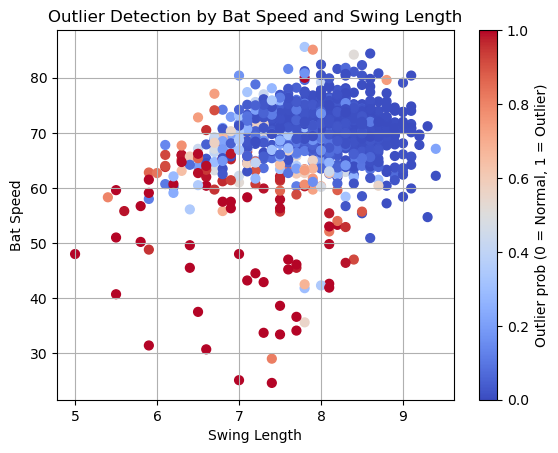

In [76]:
plt.scatter(
    x = jake_mccarthy["swing_length"],
    y = jake_mccarthy["bat_speed"],
    c = jake_mccarthy["outlier_prob"],
    cmap= "coolwarm",
    s = 40,
    vmin = 0,
    vmax = 1)
plt.colorbar(label = "Outlier prob (0 = Normal, 1 = Outlier)")
plt.xlabel("Swing Length")
plt.ylabel("Bat Speed")
plt.title("Outlier Detection by Bat Speed and Swing Length")
plt.grid(True)
plt.show()

Notes:
Jazz Chisholm and Jake Mccarthy are the leaders in greatest however, their bounds on outlier probabilities seem to be stuck around .5 for every swing. Will have to check model diagnostics a little further as well as residuals.

For Andres Gimenez, the true leader, alot of datapoints seem to lead to slower swings on pitches that already are expected to have slow swings (small residuals). I believe this is because his bat speed distribution is bimodal, with several peaks. The model currently assumes a normal distribution of bat speeds and swing lengths currently which would in turn make multimodality an issue. In baseball terms, I hypothesize that he has A and B swings that are shaping his bat speed due to other factors. The next feature I will look to add is controlling for count.